# 2D DDW

## Imports

In [302]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Extraction and Cleaning

For our project, the 6 factors that we are using to predict food security are:
1. GDP per capita adjusted for PPP
2. Agricultural land per capita
3. Percentage of population with basic water service
4. Percentage of population with eating disorder
5. Percentage of population employed in agriculture forestry fishery
6. $CO_{2}$ emitted per agricultural land area

As such, we have obtained the following raw data for all the countries:
1. Amount of agricultural land allocated per countries (in $km^{2}$)
2. Percentage of population with access to basic drinking water

The code below extracts the relevant data from each file and processses it to match our 6 factors.

### Extract food supply data for 2018

The following code extracts the total food supply for each country in 2018. This data is extracted from "DDW_Food Supply.csv".

In [303]:
# read food supply csv
df_food_supply = pd.read_csv("DDW_Food Supply.csv")
# extract values only when item is "Grand Total"
df_grand_total = df_food_supply[(df_food_supply["Item"] == "Grand Total")]
# extract values from the specified year
dfyears_food_supply = df_grand_total[(df_grand_total["Year"]==2017)]
# extract year, country and food supply
dfyears_food_supply = dfyears_food_supply[["Year", "Area", "Value"]]
dfyears_food_supply = dfyears_food_supply.rename(columns = {"Area": "Country", "Value": "Food_supply"})
# set index from 0
dfyears_food_supply = dfyears_food_supply.reset_index(drop=True)
# print dataframe
dfyears_food_supply

,Year,Country,Food_supply
0,2017,Afghanistan,2303
1,2017,Albania,3326
2,2017,Algeria,3383
3,2017,Angola,2441
4,2017,Antigua and Barbuda,2446
...,...,...,...
209,2017,Least Developed Countries,2402
210,2017,Land Locked Developing Countries,2539
211,2017,Small Island Developing States,2685
212,2017,Low Income Food Deficit Countries,2505


##### Finding the unique countries in food supply data

In [304]:
df_food_supply_countries = dfyears_food_supply.Country.unique()
# print(df_food_supply_countries)

### Extract minimum calorie intake data for 2018

In [305]:
# read minimum calorie intake csv
df_min_cal_intake = pd.read_csv("DDW_Min Cal Intake.csv")
# extract values that are not missing
df_min_cal_intake = df_min_cal_intake[df_min_cal_intake["Value"].notna()]
# extract year 2013 - 2017 values
dfyears_min_cal = df_min_cal_intake[(df_min_cal_intake["Year"]==2017)]
# extract year, country and values
dfyears_min_cal = dfyears_min_cal[["Year", "Area", "Value"]]
dfyears_min_cal = dfyears_min_cal.rename(columns = {"Area": "Country", "Value":"Mininum_calorie_intake"})
# set index from 0
dfyears_min_cal = dfyears_min_cal.reset_index(drop=True)
# print dataframe
dfyears_min_cal

,Year,Country,Mininum_calorie_intake
0,2017,Afghanistan,1676.0
1,2017,Albania,1911.0
2,2017,Algeria,1781.0
3,2017,Angola,1659.0
4,2017,Antigua and Barbuda,1888.0
...,...,...,...
183,2017,Vanuatu,1695.0
184,2017,Venezuela (Bolivarian Republic of),1817.0
185,2017,Viet Nam,1785.0
186,2017,Yemen,1703.0


##### Finding the unique countries in minimum calorie intake data

In [306]:
df_min_cal_intake_countries = dfyears_min_cal.Country.unique()
# print(df_min_cal_intake_countries)

### Extract GDP per capita data for 2018

In [307]:
# read GDP, adjusted for PPP, per capita csv
df_GDP = pd.read_csv("DDW_GDP per capita adjusted.csv")
# extract values that are not missing
df_GDP = df_GDP[(df_GDP["Value"].notna())]
# extract year 2013-2017 values
dfyears_GDP = df_GDP[(df_GDP["Year"]==2017)]
# extract year, country and value
dfyears_GDP = dfyears_GDP[["Year","Area","Value"]]
dfyears_GDP = dfyears_GDP.rename(columns = {"Area": "Country", "Value":"GDP"})
# set index from 0
dfyears_GDP = dfyears_GDP.reset_index(drop=True)
# print data frame
dfyears_GDP

,Year,Country,GDP
0,2017,Afghanistan,2058.4
1,2017,Albania,12771.0
2,2017,Algeria,11737.4
3,2017,Angola,7310.9
4,2017,Antigua and Barbuda,19840.3
...,...,...,...
182,2017,Uzbekistan,6840.7
183,2017,Vanuatu,3081.5
184,2017,Viet Nam,8996.4
185,2017,Zambia,3485.0


#### List of unique countries for GDP per capita data

In [308]:
df_GDP_countries = dfyears_GDP.Country.unique()
# print(df_GGDP_countries)

### Extract total population data for 2018

In [309]:
# read total population employed csv
df_pop = pd.read_csv("DDW_Population.csv")
# extract year 2013 - 2017 values
dfyears_population = df_pop[(df_pop["year"]==2017)]
# extract values that are not missing
dfyears_population = dfyears_population[dfyears_population["population"].notna()]
# extract year, country and population value
dfyears_population = dfyears_population[["year", "country", "population"]]
dfyears_population = dfyears_population.rename(columns = {"year": "Year", "country": "Country", "population":"Population"})
# set index from 0
dfyears_population = dfyears_population.reset_index(drop=True)
# print dataframe
dfyears_population

,Year,Country,Population
0,2017,Afghanistan,3.629611e+07
1,2017,Africa,1.244222e+09
2,2017,Albania,2.884169e+06
3,2017,Algeria,4.138918e+07
4,2017,Andorra,7.699700e+04
...,...,...,...
226,2017,Wallis and Futuna,1.189400e+04
227,2017,World,7.548173e+09
228,2017,Yemen,2.783481e+07
229,2017,Zambia,1.685361e+07


#### Getting unique countries for population data

In [310]:
df_pop_coutries = dfyears_population.Country.unique()

### Extract land area used for agriculture data for 2018

In [311]:
df_agriculture = pd.read_csv("DDW_Agricultural Land.csv")

# extract countries...
dfyears_agriculture = df_agriculture[["Country Name","2017"]]
# remove rows with no value (NaN)
dfyears_agriculture = dfyears_agriculture.dropna()
dfyears_agriculture.insert(0, "Year", 2017)
dfyears_agriculture = dfyears_agriculture.rename(columns = {"2017": "Agri_land", "Country Name": "Country"})
dfyears_agriculture

,Year,Country,Agri_land
0,2017,Aruba,20.00
1,2017,Africa Eastern and Southern,6538552.75
2,2017,Afghanistan,379100.00
3,2017,Africa Western and Central,3589797.00
4,2017,Angola,563974.30
...,...,...,...
260,2017,Samoa,620.00
262,2017,"Yemen, Rep.",234520.00
263,2017,South Africa,963410.00
264,2017,Zambia,238360.00


#### Getting unique countries for Agriculture data

In [312]:
df_agriculture_countries = dfyears_agriculture.Country.unique()

### Extract CO2 (in million metric tonnes) data for 2018

In [313]:
df_co2 = pd.read_csv("DDW_CO2.csv")
dfyears_co2 = df_co2[(df_co2["year"]==2017)]
dfyears_co2 = dfyears_co2[dfyears_co2["co2"].notna()]
dfyears_co2 = dfyears_co2[["year","country","co2"]]
dfyears_co2 = dfyears_co2.rename(columns = {"year": "Year", "country": "Country", "co2": "CO2"})
dfyears_co2 = dfyears_co2.reset_index(drop=True)
dfyears_co2

,Year,Country,CO2
0,2017,Afghanistan,6.860
1,2017,Africa,1384.372
2,2017,Albania,5.302
3,2017,Algeria,154.936
4,2017,Andorra,0.465
...,...,...,...
232,2017,Wallis and Futuna,0.026
233,2017,World,35925.738
234,2017,Yemen,9.951
235,2017,Zambia,6.517


#### Getting unique countries for $CO_{2}$ data

In [314]:
df_co2_countries = dfyears_co2.Country.unique()

### Extract basic water drinking services data for 2018

In [315]:
df_water = pd.read_csv("DDW_Basic Water Drinking Services.csv")
df_water = df_water[df_water["Value"].notna()]
dfyears_water = df_water[(df_water["Year"]==2017)]
dfyears_water = dfyears_water[["Year", "Area", "Value"]]
dfyears_water = dfyears_water.rename(columns = {"Area": "Country", "Value": "Basic_water"})
dfyears_water = dfyears_water.reset_index(drop=True)
dfyears_water


,Year,Country,Basic_water
0,2017,Afghanistan,66.8
1,2017,Albania,94.1
2,2017,Algeria,93.8
3,2017,American Samoa,99.0
4,2017,Andorra,99.0
...,...,...,...
232,2017,Small Island Developing States,83.1
233,2017,Low income economies,56.5
234,2017,Lower-middle-income economies,86.5
235,2017,High-income economies,99.0


#### Getting unique countries for basic water drinking services data

In [316]:
df_water_countries = dfyears_water.Country.unique()

### Extract Eating Disorder data for 2018

In [317]:
df_eating_disorder = pd.read_csv("DDW_Eating Disorder.csv")
df_eating_disorder = df_eating_disorder[df_eating_disorder["Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)"].notna()]
df_eating_disorder = df_eating_disorder.rename(columns = {"Entity": "Country", "Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)":"Prevalence"})
dfyears_eating_disorder = df_eating_disorder[(df_eating_disorder["Year"]==2017)]
dfyears_eating_disorder = dfyears_eating_disorder[["Year", "Country", "Prevalence"]]
dfyears_eating_disorder = dfyears_eating_disorder.rename(columns = {"Prevalence": "Eating_disorder"})
dfyears_eating_disorder = dfyears_eating_disorder.reset_index(drop=True)
dfyears_eating_disorder

,Year,Country,Eating_disorder
0,2017,Afghanistan,0.12
1,2017,African Region (WHO),0.11
2,2017,Albania,0.14
3,2017,Algeria,0.22
4,2017,American Samoa,0.14
...,...,...,...
223,2017,World Bank Lower Middle Income,0.13
224,2017,World Bank Upper Middle Income,0.17
225,2017,Yemen,0.14
226,2017,Zambia,0.12


#### Getting unique countries for eating disorder data

In [318]:
df_eating_disorder_countries = dfyears_eating_disorder.Country.unique()

### Extract number of people employed in agriculture data for 2018

In [319]:
df_employment = pd.read_csv("DDW_Employment In Agriculture.csv")
df_employment = df_employment[df_employment["Value"].notna()]
dfyears_employment = df_employment[(df_employment["Year"]==2017)]
dfyears_employment = dfyears_employment[["Year", "Area", "Value"]]
dfyears_employment["Value"] = dfyears_employment["Value"]*1000
dfyears_employment = dfyears_employment.rename(columns = {"Area": "Country", "Value":"Employed_num"})
dfyears_employment = dfyears_employment.reset_index(drop=True)
dfyears_employment

,Year,Country,Employed_num
0,2017,Afghanistan,2740235.0
1,2017,Albania,453779.0
2,2017,Algeria,1102072.0
3,2017,Argentina,6840.0
4,2017,Armenia,317111.0
...,...,...,...
111,2017,Uruguay,143717.0
112,2017,Uzbekistan,3671300.0
113,2017,Venezuela (Bolivarian Republic of),1166489.0
114,2017,Viet Nam,21564822.0


#### Getting unique countries for population employed

In [320]:
df_employment_countries = dfyears_employment.Country.unique()

### Create list of common countries

In [321]:
set1 = set(df_food_supply_countries)
set2 = set(df_min_cal_intake_countries)
set3 = set(df_GDP_countries)
set4 = set(df_pop_coutries)
set5 = set(df_agriculture_countries)
set6 = set(df_co2_countries)
set7 = set(df_water_countries)
set8 = set(df_eating_disorder_countries)
set9 = set(df_employment_countries)

countries = list(set1 & set2 & set3 & set4 & set5 & set6 & set7 & set8 & set9)
print(countries)
print(len(countries))

['Mongolia', 'Italy', 'Kuwait', 'Norway', 'Algeria', 'Japan', 'Bosnia and Herzegovina', 'Israel', 'Belarus', 'Belgium', 'Myanmar', 'Netherlands', 'Malaysia', 'Thailand', 'Georgia', 'Samoa', 'Luxembourg', 'Australia', 'Barbados', 'Armenia', 'Jamaica', 'France', 'Togo', 'Romania', 'Dominican Republic', 'Panama', 'Afghanistan', 'Tunisia', 'Honduras', 'Brazil', 'North Macedonia', 'Germany', 'Jordan', 'Poland', 'Sri Lanka', 'Ireland', 'Albania', 'Iceland', 'Peru', 'Chile', 'Cyprus', 'Ecuador', 'Kazakhstan', 'Mali', 'Uganda', 'Latvia', 'Rwanda', 'Ukraine', 'Montenegro', 'Cambodia', 'Costa Rica', 'Bangladesh', 'Ghana', 'Uzbekistan', 'Canada', 'Burundi', 'Serbia', 'Finland', 'Colombia', 'New Zealand', 'Mauritius', 'Switzerland', 'Nepal', 'Paraguay', 'Uruguay', 'Mexico', 'Seychelles', 'Guatemala', 'Czechia', 'Azerbaijan', 'Denmark', 'Belize', 'Hungary', 'Estonia', 'Philippines', 'Lithuania', 'Mauritania', 'El Salvador', 'United Arab Emirates', 'Malta', 'Djibouti', 'Austria', 'Slovenia', 'Spain'

### With the list of common countries, we are now able to continue combining our dataframes ...

### Calculate food supply to mininum calorie intake ratio 
done by finding (food supply)/(mininum calorie intake)

In [322]:
dfyears_food_supply = dfyears_food_supply[dfyears_food_supply["Country"].isin(countries)]
dfyears_min_cal = dfyears_min_cal[dfyears_min_cal["Country"].isin(countries)]

dfyears_y_value = dfyears_food_supply.copy()
dfyears_y_value["Mininum_calorie_intake"] = list(dfyears_min_cal["Mininum_calorie_intake"])
dfyears_y_value["y_ratio"] = dfyears_y_value["Food_supply"]/dfyears_y_value["Mininum_calorie_intake"]
dfyears_y_value = dfyears_y_value.reset_index(drop=True)
dfyears_y_value

,Year,Country,Food_supply,Mininum_calorie_intake,y_ratio
0,2017,Afghanistan,2303,1676.0,1.374105
1,2017,Albania,3326,1911.0,1.740450
2,2017,Algeria,3383,1781.0,1.899495
3,2017,Armenia,3072,1875.0,1.638400
4,2017,Australia,3404,1911.0,1.781266
...,...,...,...,...,...
85,2017,Uganda,2030,1693.0,1.199055
86,2017,Ukraine,3062,1908.0,1.604822
87,2017,United Arab Emirates,3074,2045.0,1.503178
88,2017,Uruguay,3158,1861.0,1.696937


### Calculate Agriculture Land per capita (in $\textrm{m}^2$ per capita)

In [323]:
dfyears_agriculture = dfyears_agriculture[dfyears_agriculture["Country"].isin(countries)]
dfyears_population = dfyears_population[dfyears_population["Country"].isin(countries)]

dfyears_agriculture_per_pop = dfyears_agriculture.copy()
dfyears_agriculture_per_pop["Total_population"] = list(dfyears_population["Population"])
dfyears_agriculture_per_pop["Agri_land_cap"] = (dfyears_agriculture_per_pop["Agri_land"]/dfyears_agriculture_per_pop["Total_population"])*1000000
dfyears_agriculture_per_pop = dfyears_agriculture_per_pop.reset_index(drop=True)
dfyears_agriculture_per_pop

,Year,Country,Agri_land,Total_population,Agri_land_cap
0,2017,Afghanistan,379100.00,36296108.0,10444.646021
1,2017,Albania,11742.81,2884169.0,4071.470847
2,2017,United Arab Emirates,3838.00,41389176.0,92.729558
3,2017,Armenia,16761.00,2944789.0,5691.749052
4,2017,Australia,3718370.00,24584620.0,151247.812657
...,...,...,...,...,...
85,2017,Ukraine,414890.00,41166588.0,10078.318854
86,2017,Uruguay,142229.00,44487708.0,3197.040405
87,2017,Uzbekistan,255332.00,9487206.0,26913.297761
88,2017,Samoa,620.00,3436645.0,180.408509


### Calculate percentage of population employed in the agriculture industry

In [324]:
dfyears_employment = dfyears_employment[dfyears_employment["Country"].isin(countries)]
dfyears_population = dfyears_population[dfyears_population["Country"].isin(countries)]

dfyears_percentage_employed = dfyears_employment.copy()
dfyears_percentage_employed["Total_population"] = list(dfyears_population["Population"])
dfyears_percentage_employed["Employed_%"] = (dfyears_percentage_employed["Employed_num"]/dfyears_percentage_employed["Total_population"])*100
dfyears_percentage_employed = dfyears_percentage_employed.reset_index(drop=True)
dfyears_percentage_employed

,Year,Country,Employed_num,Total_population,Employed_%
0,2017,Afghanistan,2740235.0,36296108.0,7.549666
1,2017,Albania,453779.0,2884169.0,15.733440
2,2017,Algeria,1102072.0,41389176.0,2.662706
3,2017,Armenia,317111.0,2944789.0,10.768547
4,2017,Australia,318393.0,24584620.0,1.295090
...,...,...,...,...,...
85,2017,Uganda,4095242.0,41166588.0,9.947975
86,2017,Ukraine,2489400.0,44487708.0,5.595703
87,2017,United Arab Emirates,65857.0,9487206.0,0.694166
88,2017,Uruguay,143717.0,3436645.0,4.181898


### Calculate co2 per agricultural land (in kg per m^2)

In [325]:
dfyears_co2 = dfyears_co2[dfyears_co2["Country"].isin(countries)]
dfyears_agriculture = dfyears_agriculture[dfyears_agriculture["Country"].isin(countries)]


dfyears_co2_per_land = dfyears_co2.copy()
dfyears_co2_per_land["Agri_land"] = list(dfyears_agriculture["Agri_land"])
dfyears_co2_per_land["CO2_agri"] = (dfyears_co2_per_land["CO2"]/dfyears_co2_per_land["Agri_land"])*1000
dfyears_co2_per_land = dfyears_co2_per_land.reset_index(drop=True)
dfyears_co2_per_land


,Year,Country,CO2,Agri_land,CO2_agri
0,2017,Afghanistan,6.860,379100.00,0.018095
1,2017,Albania,5.302,11742.81,0.451510
2,2017,Algeria,154.936,3838.00,40.368942
3,2017,Armenia,5.537,16761.00,0.330350
4,2017,Australia,414.751,3718370.00,0.111541
...,...,...,...,...,...
85,2017,Uganda,5.374,414890.00,0.012953
86,2017,Ukraine,223.085,142229.00,1.568492
87,2017,United Arab Emirates,168.831,255332.00,0.661221
88,2017,Uruguay,6.163,620.00,9.940323


### Filtering the rest of the dataframes needed based on the list of common countries

In [326]:
dfyears_GDP = dfyears_GDP[dfyears_GDP["Country"].isin(countries)]
dfyears_GDP = dfyears_GDP.reset_index(drop=True)
dfyears_water = dfyears_water[dfyears_water["Country"].isin(countries)]
dfyears_water = dfyears_water.reset_index(drop=True)
dfyears_eating_disorder = dfyears_eating_disorder[dfyears_eating_disorder["Country"].isin(countries)]
dfyears_eating_disorder = dfyears_eating_disorder.reset_index(drop=True)


### Combining all the variables into 1 data frame, filtering the data based on the countries available in countries list

In [327]:
dfyears_combined = dfyears_y_value.loc[:, ["Country", "y_ratio"]]
dfyears_combined["GDP"] = dfyears_GDP.loc[:, "GDP"]
dfyears_combined["Agri_land_cap"] = dfyears_agriculture_per_pop.loc[:, "Agri_land_cap"]
dfyears_combined["Basic_water"] = dfyears_water.loc[:, "Basic_water"]
dfyears_combined["Eating_disorder"] = dfyears_eating_disorder.loc[:, "Eating_disorder"]
dfyears_combined["Employed_%"] = dfyears_percentage_employed.loc[:, "Employed_%"]
dfyears_combined["CO2_agri"] = dfyears_co2_per_land.loc[:, "CO2_agri"]
dfyears_combined.insert(0, "Year", 2012)
dfyears_combined = dfyears_combined.reset_index(drop=True)
dfyears_combined

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Eating_disorder,Employed_%,CO2_agri
0,2012,Afghanistan,1.374105,2058.4,10444.646021,66.8,0.12,7.549666,0.018095
1,2012,Albania,1.740450,12771.0,4071.470847,94.1,0.14,15.733440,0.451510
2,2012,Algeria,1.899495,11737.4,92.729558,93.8,0.22,2.662706,40.368942
3,2012,Armenia,1.638400,12115.1,5691.749052,99.0,0.13,10.768547,0.330350
4,2012,Australia,1.781266,48398.5,151247.812657,99.0,1.11,1.295090,0.111541
...,...,...,...,...,...,...,...,...,...
85,2012,Uganda,1.199055,2074.7,10078.318854,51.0,0.10,9.947975,0.012953
86,2012,Ukraine,1.604822,11860.6,3197.040405,93.8,0.13,5.595703,1.568492
87,2012,United Arab Emirates,1.503178,67183.6,26913.297761,99.0,0.31,0.694166,0.661221
88,2012,Uruguay,1.696937,23009.9,180.408509,99.0,0.38,4.181898,9.940323


In [328]:
# convert the dataframe to a csv for each year
#dfyears_combined.to_csv("df2012_combined.csv")

#### Combinining the dataframes for years 2013 to 2017 into 1 dataframe

In [329]:
# read the csv for each year
df2013_combined = pd.read_csv("df2013_combined.csv")
df2014_combined = pd.read_csv("df2014_combined.csv")
df2015_combined = pd.read_csv("df2015_combined.csv")
df2016_combined = pd.read_csv("df2016_combined.csv")
df2017_combined = pd.read_csv("df2017_combined.csv")

In [330]:
# combine all the 5 dataframes in 1
dfallyears_combined = pd.concat([df2013_combined, df2014_combined, df2015_combined, df2016_combined, df2017_combined])
dfallyears_combined = dfallyears_combined.drop(columns = "Unnamed: 0")
dfallyears_combined = dfallyears_combined.reset_index(drop=True)
#dfallyears_combined.to_csv("dfallyears_combined.csv")
dfallyears_combined

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Eating_disorder,Employed_%,CO2_agri
0,2013,Albania,1.718685,11361.3,4.088797e+03,92.6,0.14,15.527752,0.415059
1,2013,Algeria,1.914206,11319.1,3.223308e+04,93.0,0.22,2.991599,0.107726
2,2013,Argentina,1.728202,24424.1,3.988526e+02,98.9,0.35,0.159302,11.297267
3,2013,Armenia,1.607238,10691.3,1.283048e+06,99.0,0.13,14.568022,0.001489
4,2013,Australia,1.790601,46744.6,1.168097e+03,99.0,1.10,1.286984,14.473973
...,...,...,...,...,...,...,...,...,...
433,2017,Uganda,1.199055,2074.7,1.007832e+04,51.0,0.10,9.947975,0.012953
434,2017,Ukraine,1.604822,11860.6,3.197040e+03,93.8,0.13,5.595703,1.568492
435,2017,United Arab Emirates,1.503178,67183.6,2.691330e+04,99.0,0.31,0.694166,0.661221
436,2017,Uruguay,1.696937,23009.9,1.804085e+02,99.0,0.38,4.181898,9.940323


In [331]:
#df2017_combined.to_csv("df2017_combined_v1.csv")

### Removal of outliers (keith clean)

In [332]:
def identify_outlier(dataframe, i):
    q3 = dataframe[i].quantile(q=0.75)
    q1 = dataframe[i].quantile(q=0.25)
    IQR = q3 - q1
    upper_outlier = q3 + 1.5*IQR
    lower_outlier = q1 - 1.5*IQR
    return upper_outlier, lower_outlier

In [333]:
# def drop_outlier_value(df, column, outlier_value):
#     return df[column] <= outlier_value[0] and df[column] >= outlier_value[1]

#### List of countries left after removol of countries with outliers

In [334]:
# identifier outlier for each factor
GDP_outlier = identify_outlier(dfallyears_combined, "GDP")
Agri_cap_outlier = identify_outlier(dfallyears_combined, "Agri_land_cap")
Water_outlier = identify_outlier(dfallyears_combined, "Basic_water")
Eating_outlier = identify_outlier(dfallyears_combined, "Eating_disorder")
Employed_outlier = identify_outlier(dfallyears_combined, "Employed_%")
CO2_outlier = identify_outlier(dfallyears_combined, "CO2_agri")

# removal of rows with outliers
dfallyears_removed = dfallyears_combined.copy()
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["GDP"] <= GDP_outlier[0]) & (dfallyears_removed["GDP"] >= GDP_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Agri_land_cap"] <= Agri_cap_outlier[0]) & (dfallyears_removed["Agri_land_cap"] >= Agri_cap_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Basic_water"] <= Water_outlier[0]) & (dfallyears_removed["Basic_water"] >= Water_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Eating_disorder"] <= Eating_outlier[0]) & (dfallyears_removed["Eating_disorder"] >= Eating_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Employed_%"] <= Employed_outlier[0]) & (dfallyears_removed["Employed_%"] >= Employed_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["CO2_agri"] <= CO2_outlier[0]) & (dfallyears_removed["CO2_agri"] >= CO2_outlier[1]), :]
dfallyears_removed = dfallyears_removed.reset_index(drop=True)
dfallyears_removed
# dfallyears_combined_2 = dfallyears_combined.loc[(dfallyears_combined["Agri_land_cap"] <= identify_outlier(dfallyears_combined, "Agri_land_cap")[0]) &(dfallyears_combined["Agri_land_cap"] >= identify_outlier(dfallyears_combined, "Agri_land_cap")[1]), :]
# dfallyears_combined_3 = dfallyears_combined.loc[(dfallyears_combined["Basic_water"] <= identify_outlier(dfallyears_combined, "Basic_water")[0]) &(dfallyears_combined["Basic_water"] >= identify_outlier(dfallyears_combined, "Basic_water")[1]), :]
# dfallyears_combined_4 = dfallyears_combined.loc[(dfallyears_combined["Eating_disorder"] <= identify_outlier(dfallyears_combined, "Eating_disorder")[0]) &(dfallyears_combined["Eating_disorder"] >= identify_outlier(dfallyears_combined, "Eating_disorder")[1]), :]
# dfallyears_combined_5 = dfallyears_combined.loc[(dfallyears_combined["Employed_%"] <= identify_outlier(dfallyears_combined, "Employed_%")[0]) &(dfallyears_combined["Employed_%"] >= identify_outlier(dfallyears_combined, "Employed_%")[1]), :]
# dfallyears_combined_6 = dfallyears_combined.loc[(dfallyears_combined["CO2_agri"] <= identify_outlier(dfallyears_combined, "CO2_agri")[0]) &(dfallyears_combined["CO2_agri"] >= identify_outlier(dfallyears_combined, "CO2_agri")[1]), :]


,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Eating_disorder,Employed_%,CO2_agri
0,2013,Albania,1.718685,11361.3,4088.797116,92.6,0.14,15.527752,0.415059
1,2013,Algeria,1.914206,11319.1,32233.078561,93.0,0.22,2.991599,0.107726
2,2013,Austria,1.907645,52997.8,5574.676863,99.0,0.61,2.195136,1.420584
3,2013,Azerbaijan,1.660085,14651.7,1424.010121,89.8,0.15,17.872206,2.634867
4,2013,Bangladesh,1.384876,3965.4,607.352349,96.8,0.11,17.144373,0.665898
...,...,...,...,...,...,...,...,...,...
241,2017,Thailand,1.467374,17423.0,3281.326073,99.0,0.14,17.025430,1.259181
242,2017,Tunisia,1.901540,11234.5,12607.756302,96.0,0.22,4.459936,0.202782
243,2017,Ukraine,1.604822,11860.6,3197.040405,93.8,0.13,5.595703,1.568492
244,2017,United Arab Emirates,1.503178,67183.6,26913.297761,99.0,0.31,0.694166,0.661221


## After z-normalization (keith clean)

In [335]:
def normalize_z(df):
    dfout = (df - df.mean(axis = 0)) / df.std(axis = 0)
    return dfout

In [336]:
dfallyears_normalized = dfallyears_removed.copy()
dfallyears_normalized["GDP_normalized"] = normalize_z(dfallyears_normalized["GDP"])
dfallyears_normalized["Agri_land_cap_normalized"] = normalize_z(dfallyears_normalized["Agri_land_cap"])
dfallyears_normalized["Basic_water_normalized"] = normalize_z(dfallyears_normalized["Basic_water"])
dfallyears_normalized["Eating_disorder_normalized"] = normalize_z(dfallyears_normalized["Eating_disorder"])
dfallyears_normalized["Employed_%_normalized"] = normalize_z(dfallyears_normalized["Employed_%"])
dfallyears_normalized["CO2_agri_normalized"] = normalize_z(dfallyears_normalized["CO2_agri"])
dfallyears_normalized

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Eating_disorder,Employed_%,CO2_agri,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,CO2_agri_normalized
0,2013,Albania,1.718685,11361.3,4088.797116,92.6,0.14,15.527752,0.415059,-0.835531,-0.545290,-1.440541,-0.914102,1.985003,-0.587407
1,2013,Algeria,1.914206,11319.1,32233.078561,93.0,0.22,2.991599,0.107726,-0.837990,1.389634,-1.300914,-0.379971,-0.609040,-0.793541
2,2013,Austria,1.907645,52997.8,5574.676863,99.0,0.61,2.195136,1.420584,1.591304,-0.443136,0.793489,2.223916,-0.773848,0.087017
3,2013,Azerbaijan,1.660085,14651.7,1424.010121,89.8,0.15,17.872206,2.634867,-0.643746,-0.728495,-2.417929,-0.847336,2.470129,0.901459
4,2013,Bangladesh,1.384876,3965.4,607.352349,96.8,0.11,17.144373,0.665898,-1.266610,-0.784640,0.025542,-1.114401,2.319522,-0.419165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2017,Thailand,1.467374,17423.0,3281.326073,99.0,0.14,17.025430,1.259181,-0.482217,-0.600804,0.793489,-0.914102,2.294910,-0.021239
242,2017,Tunisia,1.901540,11234.5,12607.756302,96.0,0.22,4.459936,0.202782,-0.842921,0.040390,-0.253712,-0.379971,-0.305205,-0.729785
243,2017,Ukraine,1.604822,11860.6,3197.040405,93.8,0.13,5.595703,1.568492,-0.806428,-0.606598,-1.021660,-0.980868,-0.070186,0.186221
244,2017,United Arab Emirates,1.503178,67183.6,26913.297761,99.0,0.31,0.694166,0.661221,2.418141,1.023899,0.793489,0.220926,-1.084436,-0.422302


## Training 1st Model
- We will be defining some functions that we have used in class

In [337]:
# def normalize_z(dfin):
#     dfout = (dfin - dfin.mean(axis=0))/dfin.std(axis=0)
#     return dfout

# def normalize_min_max(dfin):
#     dfout = (dfin - dfin.min(axis=0))/(dfin.max(axis=0) - dfin.min(axis=0))
#     return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy().reshape(-1, len(df_feature.columns))
    X = np.concatenate((np.ones((feature.shape[0],1)),feature), axis = 1)
    return X

def prepare_target(df_target):
    target = df_target.to_numpy().reshape(-1, len(df_target.columns))
    return target

def predict(df_feature, beta):
    # Commented out normalising data as data cleaning already did it
    # feature_norm = normalize_z(df_feature)
    # X = prepare_feature(feature_norm)
    X = prepare_feature(df_feature)
    return np.matmul(X, beta)

def calc_linear(X, beta):
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    
    k = int(test_size*len(indexes))
    test_index = np.random.choice(indexes, k, replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[train_index,:]
    df_feature_test = df_feature.loc[test_index,:]
    
    df_target_train = df_target.loc[train_index,:]
    df_target_test = df_target.loc[test_index,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    ymean = np.mean(y)
    diff = y-ymean
    sstot = np.matmul(diff.T, diff)
    error = y -ypred
    ssres = np.matmul(error.T,error)
    return 1 - ssres/sstot

def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return (1/n)*np.matmul(error.T, error)[0][0]

def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    error = calc_linear(X,beta)-y
    error_sq = np.matmul(error.T,error)
    J = (1/(2*m)) * error_sq
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters,1))
    for n in range(num_iters):
        deriv = np.matmul(X.T,calc_linear(X,beta)-y)
        beta = beta - (alpha * (1/m)) * deriv
        J_storage[n] = compute_cost(X,y,beta)
    return beta, J_storage

### Considering Possible Removal of Features
- We will be using another metric to verify whether there is a good possible relationship between our features and the target. We decided to use Mean Absolute Error (MAE)
$$\large \textrm{MAE} = \frac{1}{n} \sum |y_i - x_i| %$$

In [338]:
def mean_absolute_error(df,feature,target):
    x = df[feature].to_numpy()
    y = df[target].to_numpy()
    n = df.shape[0]
    error = np.abs((y-x))
    return (1/n) * (error.sum())

In [339]:
def mean_absolute_error_percentage(df,feature,target):
    x = df[feature].to_numpy()
    y = df[target].to_numpy()
    n = df.shape[0]
    error = np.abs((y-x)/y)
    return ((1/n) * (error.sum())) / 100
    

#### Applying MAE on normalised 2017 data

In [340]:
features = ["GDP_normalized","Agri_land_cap_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","CO2_agri_normalized"]
target = ['y_ratio']

print("MAE Data\n")
for feature in features:
    mae = mean_absolute_error(dfallyears_normalized,feature,target)
    print(f"\t{feature}: {mae}\n")

MAE Data

	GDP_normalized: 426.0910854483676

	Agri_land_cap_normalized: 445.42687381009733

	Basic_water_normalized: 405.34380251487073

	Eating_disorder_normalized: 420.87473933074347

	Employed_%_normalized: 428.2901574876486

	CO2_agri_normalized: 446.3516609168741



### Preparing the Data

#### Getting Features and Targets

In [341]:
dfallyears_feature , dfallyears_target = get_features_targets(dfallyears_normalized,features,target)
# # df2017_feature is already normalisead
# # df2017_target was not normalised above
display(dfallyears_feature.describe())
display(dfallyears_target.describe())


,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,CO2_agri_normalized
count,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02
mean,-1.877450e-16,-2.166289e-17,7.419539e-15,-5.054674e-17,-1.227564e-16,-1.913555e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.289936e+00,-8.176428e-01,-2.801903e+00,-1.181167e+00,-1.214386e+00,-8.589097e-01
25%,-7.947972e-01,-6.194479e-01,-8.471266e-01,-7.805692e-01,-8.374143e-01,-6.834671e-01
50%,-3.732217e-01,-4.665750e-01,6.189558e-01,-3.799711e-01,-3.080225e-01,-3.860079e-01
75%,5.278848e-01,2.172465e-01,7.934894e-01,9.386643e-01,7.817332e-01,4.206875e-01
max,2.707613e+00,3.622169e+00,7.934894e-01,2.557748e+00,2.570650e+00,3.989498e+00


,y_ratio
count,246.000000
mean,1.647739
std,0.141916
min,1.266631
25%,1.526006
50%,1.649479
75%,1.749036
max,2.005062


In [342]:
features_y = features.copy()
features_y.insert(0,"y_ratio")
features_y.insert(0,"Country")
dfallyears_normalized_only = dfallyears_normalized.loc[:,features_y]
print("First five data sets")
display(dfallyears_normalized_only.head())

First five data sets


,Country,y_ratio,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,CO2_agri_normalized
0,Albania,1.718685,-0.835531,-0.545290,-1.440541,-0.914102,1.985003,-0.587407
1,Algeria,1.914206,-0.837990,1.389634,-1.300914,-0.379971,-0.609040,-0.793541
2,Austria,1.907645,1.591304,-0.443136,0.793489,2.223916,-0.773848,0.087017
3,Azerbaijan,1.660085,-0.643746,-0.728495,-2.417929,-0.847336,2.470129,0.901459
4,Bangladesh,1.384876,-1.266610,-0.784640,0.025542,-1.114401,2.319522,-0.419165


#### Pair Plots

In [343]:
# sns.set()
# myplot = sns.pairplot(data=df2017_normalised_only)

### Splitting the Data

In [344]:
dfallyears_feature_train , dfallyears_feature_test ,dfallyears_target_train , dfallyears_target_test = split_data(dfallyears_feature,dfallyears_target)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5056\346693879.py:44: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5056\346693879.py:45: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5056\346693879.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5056\346693879.py:48: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]


### Cost Function

In [345]:
X = prepare_feature(dfallyears_feature_train)
target = prepare_target(dfallyears_target_train)

beta = np.zeros((7,1))
J = compute_cost(X,target,beta)
print(J)

beta = np.ones((7,1))
J = compute_cost(X, target, beta)
print(J)

[[1.36408139]]
[[2.99748506]]


### Gradient Descent
- Using 1500 iterations and alpha of 0.01
- Also choosing the lower cost function

In [346]:
iterations = 1500 # arbitrary value
alpha = 0.01 # arbitrary value
beta = np.zeros((7,1))

beta , J_storage = gradient_descent(X,target,beta,alpha,iterations)
print(beta)

[[ 1.64417562]
 [ 0.05693117]
 [-0.02294167]
 [ 0.03964438]
 [ 0.00507765]
 [ 0.00698245]
 [-0.01144116]]


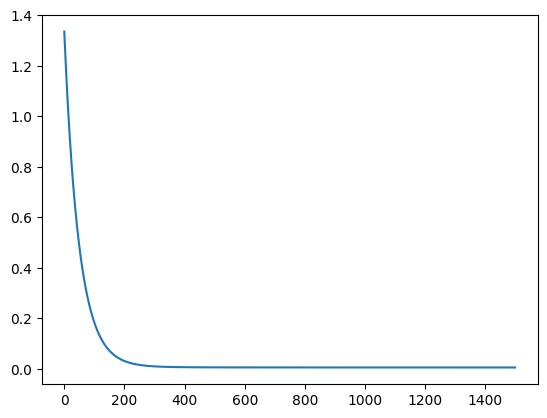

In [347]:
plt.plot(J_storage)

### Running Predictions

In [348]:
pred = predict(dfallyears_feature_test,beta)

#### For 1st to 6th factor to test the model

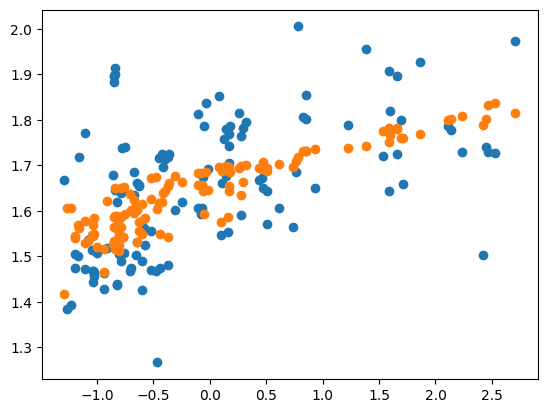

In [349]:
plt.scatter(dfallyears_feature_test["GDP_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["GDP_normalized"],pred)

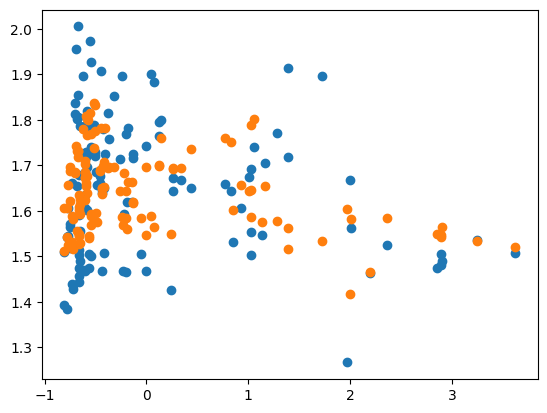

In [350]:
plt.scatter(dfallyears_feature_test["Agri_land_cap_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["Agri_land_cap_normalized"],pred)

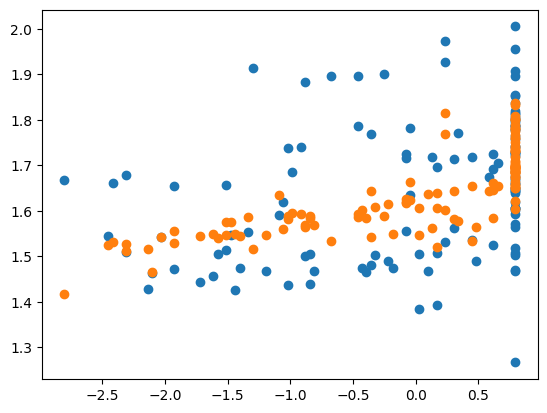

In [351]:
plt.scatter(dfallyears_feature_test["Basic_water_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["Basic_water_normalized"],pred)

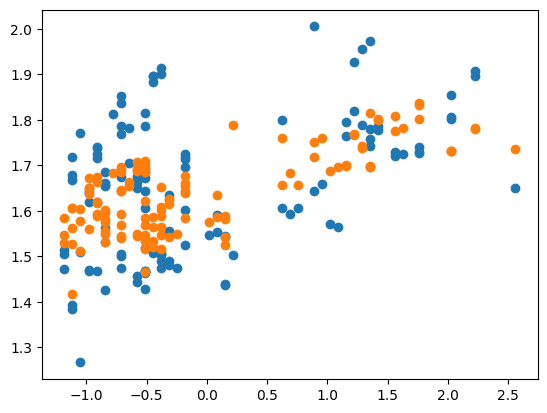

In [352]:
plt.scatter(dfallyears_feature_test["Eating_disorder_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["Eating_disorder_normalized"],pred)

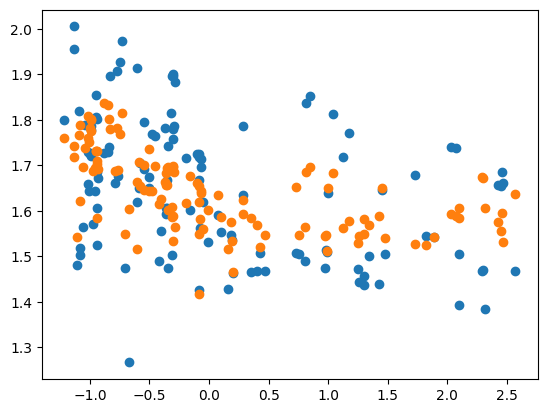

In [353]:
plt.scatter(dfallyears_feature_test["Employed_%_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["Employed_%_normalized"],pred)

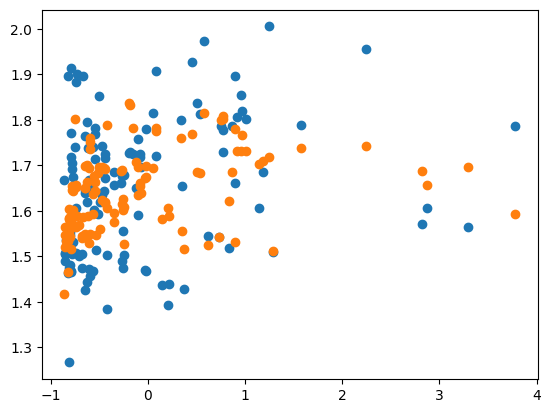

In [354]:
plt.scatter(dfallyears_feature_test["CO2_agri_normalized"],dfallyears_target_test)
plt.scatter(dfallyears_feature_test["CO2_agri_normalized"],pred)

## Improved model:

added in fat and protein

carbohydrate = total energy - (total fat * 9) - (total protein * 4)

### Cleaning of new dataframe of factor to be added in

### Extract protein and fat supply dataframe

In [355]:
# read fat and protein supply csv
dfyears_f_p = pd.read_csv("DDW_Fat and Protein Supply.csv")
# rename column name and value within "Year" column
dfyears_f_p = dfyears_f_p.rename(columns = {"Area": "Country"})
dfyears_f_p = dfyears_f_p.replace({"Average protein supply (g/cap/day) (3-year average)": "Protein", "Average fat supply (g/cap/day) (3-year average)": "Fat"})
dfyears_f_p = dfyears_f_p.replace({"2011-2013": 2012, "2012-2014": 2013, "2013-2015": 2014, "2014-2016": 2015, "2015-2017": 2016, "2016-2018": 2017})

In [356]:
# extract values only when item is protein
dfyears_protein = dfyears_f_p[(dfyears_f_p["Item"] == "Protein")]
# extract values for the specified year
dfyears_protein = dfyears_protein[(dfyears_protein["Year"]==2013)]
# extract year, country and food supply
dfyears_protein = dfyears_protein[["Year", "Country", "Value"]]
# rename "Value" column
dfyears_protein = dfyears_protein.rename(columns = {"Value": "Protein"})
# drop rows with no value (NaN)
dfyears_protein = dfyears_protein.dropna()
# set index from 0
dfyears_protein = dfyears_protein.reset_index(drop=True)
# print dataframe
dfyears_protein


,Year,Country,Protein
0,2013,Afghanistan,58.0
1,2013,Albania,109.0
2,2013,Algeria,90.7
3,2013,Angola,53.7
4,2013,Argentina,101.3
...,...,...,...
161,2013,Vanuatu,67.0
162,2013,Venezuela (Bolivarian Republic of),75.7
163,2013,Viet Nam,80.7
164,2013,Yemen,60.6


In [357]:
# extract values only when item is fat
dfyears_fat = dfyears_f_p[(dfyears_f_p["Item"] == "Fat")]
# extract values for the specified year
dfyears_fat = dfyears_fat[(dfyears_fat["Year"]==2013)]
# extract year, country and food supply
dfyears_fat = dfyears_fat[["Year", "Country", "Value"]]
# rename "Value" column
dfyears_fat = dfyears_fat.rename(columns = {"Value": "Fat"})
# drop rows with no value (NaN)
dfyears_fat = dfyears_fat.dropna()
# set index from 0
dfyears_fat = dfyears_fat.reset_index(drop=True)
# print dataframe
dfyears_fat

,Year,Country,Fat
0,2013,Afghanistan,38.1
1,2013,Albania,108.7
2,2013,Algeria,94.1
3,2013,Angola,57.8
4,2013,Antigua and Barbuda,95.6
...,...,...,...
175,2013,Venezuela (Bolivarian Republic of),100.3
176,2013,Viet Nam,73.0
177,2013,Yemen,45.6
178,2013,Zambia,49.6


In [358]:
df_fat_countries = dfyears_fat.Country.unique()
df_protein_countries = dfyears_protein.Country.unique()

In [359]:
# read food supply csv
df_food_supply = pd.read_csv("DDW_Food Supply.csv")
# extract values only when item is "Grand Total"
df_grand_total = df_food_supply[(df_food_supply["Item"] == "Grand Total")]
# extract values from the specified year
dfyears_food_supply = df_grand_total[(df_grand_total["Year"]==2013)]
# extract year, country and food supply
dfyears_food_supply = dfyears_food_supply[["Year", "Area", "Value"]]
dfyears_food_supply = dfyears_food_supply.rename(columns = {"Area": "Country", "Value": "Food_supply"})
# set index from 0
dfyears_food_supply = dfyears_food_supply.reset_index(drop=True)
# print dataframe
dfyears_food_supply

,Year,Country,Food_supply
0,2013,Afghanistan,2196
1,2013,Albania,3293
2,2013,Algeria,3436
3,2013,Angola,2472
4,2013,Antigua and Barbuda,2408
...,...,...,...
208,2013,Least Developed Countries,2381
209,2013,Land Locked Developing Countries,2515
210,2013,Small Island Developing States,2645
211,2013,Low Income Food Deficit Countries,2458


In [360]:
df_food_supply_countries = dfyears_food_supply.Country.unique()
# print(df_food_supply_countries)

In [361]:
# read minimum calorie intake csv
df_min_cal_intake = pd.read_csv("DDW_Min Cal Intake.csv")
# extract values that are not missing
df_min_cal_intake = df_min_cal_intake[df_min_cal_intake["Value"].notna()]
# extract year 2013 - 2017 values
dfyears_min_cal = df_min_cal_intake[(df_min_cal_intake["Year"]==2013)]
# extract year, country and values
dfyears_min_cal = dfyears_min_cal[["Year", "Area", "Value"]]
dfyears_min_cal = dfyears_min_cal.rename(columns = {"Area": "Country", "Value":"Mininum_calorie_intake"})
# set index from 0
dfyears_min_cal = dfyears_min_cal.reset_index(drop=True)
# print dataframe
dfyears_min_cal

,Year,Country,Mininum_calorie_intake
0,2013,Afghanistan,1652.0
1,2013,Albania,1916.0
2,2013,Algeria,1795.0
3,2013,Angola,1653.0
4,2013,Antigua and Barbuda,1885.0
...,...,...,...
183,2013,Vanuatu,1692.0
184,2013,Venezuela (Bolivarian Republic of),1812.0
185,2013,Viet Nam,1789.0
186,2013,Yemen,1691.0


In [362]:
df_min_cal_intake_countries = dfyears_min_cal.Country.unique()
# print(df_min_cal_intake_countries)

In [363]:
# read GDP, adjusted for PPP, per capita csv
df_GDP = pd.read_csv("DDW_GDP per capita adjusted.csv")
# extract values that are not missing
df_GDP = df_GDP[(df_GDP["Value"].notna())]
# extract year 2013-2017 values
dfyears_GDP = df_GDP[(df_GDP["Year"]==2013)]
# extract year, country and value
dfyears_GDP = dfyears_GDP[["Year","Area","Value"]]
dfyears_GDP = dfyears_GDP.rename(columns = {"Area": "Country", "Value":"GDP"})
# set index from 0
dfyears_GDP = dfyears_GDP.reset_index(drop=True)
# print data frame
dfyears_GDP

,Year,Country,GDP
0,2013,Afghanistan,2116.5
1,2013,Albania,11361.3
2,2013,Algeria,11319.1
3,2013,Angola,8141.2
4,2013,Antigua and Barbuda,17643.1
...,...,...,...
182,2013,Uzbekistan,5781.2
183,2013,Vanuatu,2975.5
184,2013,Viet Nam,7218.9
185,2013,Zambia,3399.7


In [364]:
df_GDP_countries = dfyears_GDP.Country.unique()
# print(df_GGDP_countries)

In [365]:
# read total population employed csv
df_pop = pd.read_csv("DDW_Population.csv")
# extract year 2013 - 2017 values
dfyears_population = df_pop[(df_pop["year"]==2013)]
# extract values that are not missing
dfyears_population = dfyears_population[dfyears_population["population"].notna()]
# extract year, country and population value
dfyears_population = dfyears_population[["year", "country", "population"]]
dfyears_population = dfyears_population.rename(columns = {"year": "Year", "country": "Country", "population":"Population"})
# set index from 0
dfyears_population = dfyears_population.reset_index(drop=True)
# print dataframe
dfyears_population

,Year,Country,Population
0,2013,Afghanistan,3.226959e+07
1,2013,Africa,1.123045e+09
2,2013,Albania,2.903788e+06
3,2013,Algeria,3.814014e+07
4,2013,Andorra,8.077000e+04
...,...,...,...
226,2013,Wallis and Futuna,1.235300e+04
227,2013,World,7.210891e+09
228,2013,Yemen,2.514711e+07
229,2013,Zambia,1.492655e+07


In [366]:
df_pop_coutries = dfyears_population.Country.unique()

In [367]:
df_agriculture = pd.read_csv("DDW_Agricultural Land.csv")

# extract countries...
dfyears_agriculture = df_agriculture[["Country Name","2013"]]
# remove rows with no value (NaN)
dfyears_agriculture = dfyears_agriculture.dropna()
dfyears_agriculture.insert(0, "Year", 2013)
dfyears_agriculture = dfyears_agriculture.rename(columns = {"2013": "Agri_land", "Country Name": "Country"})
dfyears_agriculture

,Year,Country,Agri_land
0,2013,Aruba,20.00
1,2013,Africa Eastern and Southern,6461235.65
2,2013,Afghanistan,379100.00
3,2013,Africa Western and Central,3572750.10
4,2013,Angola,541771.86
...,...,...,...
260,2013,Samoa,610.00
262,2013,"Yemen, Rep.",234990.00
263,2013,South Africa,963410.00
264,2013,Zambia,237360.00


In [368]:
df_agriculture_countries = dfyears_agriculture.Country.unique()

In [369]:
df_water = pd.read_csv("DDW_Basic Water Drinking Services.csv")
df_water = df_water[df_water["Value"].notna()]
dfyears_water = df_water[(df_water["Year"]==2013)]
dfyears_water = dfyears_water[["Year", "Area", "Value"]]
dfyears_water = dfyears_water.rename(columns = {"Area": "Country", "Value": "Basic_water"})
dfyears_water = dfyears_water.reset_index(drop=True)
dfyears_water


,Year,Country,Basic_water
0,2013,Afghanistan,56.0
1,2013,Albania,92.6
2,2013,Algeria,93.0
3,2013,American Samoa,99.0
4,2013,Andorra,99.0
...,...,...,...
234,2013,Small Island Developing States,82.3
235,2013,Low income economies,52.9
236,2013,Lower-middle-income economies,84.3
237,2013,High-income economies,99.0


In [370]:
df_water_countries = dfyears_water.Country.unique()

#### Extract list of common countries

In [371]:
set1 = set(df_food_supply_countries)
set2 = set(df_min_cal_intake_countries)
set3 = set(df_fat_countries)
set4 = set(df_protein_countries)
set5 = set(df_GDP_countries)
set6 = set(df_pop_coutries)
set7 = set(df_agriculture_countries)
set8 = set(df_water_countries)

countries = list(set1 & set2 & set3 & set4 & set5 & set6 & set7 & set8)
print(countries)
print(len(countries))

['Mongolia', 'Italy', 'Malawi', 'Papua New Guinea', 'Kuwait', 'Norway', 'Argentina', 'Algeria', 'Japan', 'Bosnia and Herzegovina', 'Israel', 'Kiribati', 'Belarus', 'India', 'Turkmenistan', 'Belgium', 'Myanmar', 'Netherlands', 'Malaysia', 'Samoa', 'Georgia', 'Morocco', 'Thailand', 'Luxembourg', 'Australia', 'Barbados', 'Armenia', 'Jamaica', 'Ethiopia', 'Lebanon', 'France', 'Namibia', 'Togo', 'Kenya', 'Romania', 'Sudan', 'Dominican Republic', 'Panama', 'Afghanistan', 'Suriname', 'Tunisia', 'Honduras', 'Pakistan', 'Senegal', 'Eswatini', 'Brazil', 'North Macedonia', 'Germany', 'Jordan', 'Sri Lanka', 'Poland', 'Ireland', 'Nicaragua', 'Chad', 'Albania', 'Iceland', 'Peru', 'Chile', 'Cyprus', 'Ecuador', 'Kazakhstan', 'Mali', 'Sierra Leone', 'Madagascar', 'Sao Tome and Principe', 'Guyana', 'Latvia', 'Trinidad and Tobago', 'Fiji', 'Rwanda', 'Ukraine', 'Montenegro', 'Cambodia', 'Costa Rica', 'Bangladesh', 'Ghana', 'Uzbekistan', 'Canada', 'Dominica', 'Botswana', 'Colombia', 'Finland', 'Saudi Arabi

In [372]:
dfyears_protein = dfyears_protein[dfyears_protein["Country"].isin(countries)]
dfyears_fat = dfyears_fat[dfyears_fat["Country"].isin(countries)]
dfyears_food_supply = dfyears_food_supply[dfyears_food_supply["Country"].isin(countries)]

dfyears_carb = dfyears_protein.copy()
dfyears_carb["Fat"] = list(dfyears_fat["Fat"])
dfyears_carb["Total_energy"] = list(dfyears_food_supply["Food_supply"])
dfyears_carb["Carbohydrate"] = dfyears_carb["Total_energy"] - 9*dfyears_carb["Fat"] - 4*dfyears_carb["Protein"]
dfyears_carb = dfyears_carb.reset_index(drop=True)
dfyears_carb

,Year,Country,Protein,Fat,Total_energy,Carbohydrate
0,2013,Afghanistan,58.0,38.1,2196,1621.1
1,2013,Albania,109.0,108.7,3293,1878.7
2,2013,Algeria,90.7,94.1,3436,2226.3
3,2013,Angola,53.7,57.8,2472,1737.0
4,2013,Argentina,101.3,114.3,3211,1777.1
...,...,...,...,...,...,...
123,2013,Ukraine,89.0,89.0,3169,2012.0
124,2013,United Arab Emirates,78.0,108.3,3062,1775.3
125,2013,Uruguay,87.0,104.0,3133,1849.0
126,2013,Uzbekistan,95.0,86.4,3165,2007.4


In [373]:
dfyears_food_supply = dfyears_food_supply[dfyears_food_supply["Country"].isin(countries)]
dfyears_min_cal = dfyears_min_cal[dfyears_min_cal["Country"].isin(countries)]

dfyears_y_value = dfyears_food_supply.copy()
dfyears_y_value["Mininum_calorie_intake"] = list(dfyears_min_cal["Mininum_calorie_intake"])
dfyears_y_value["y_ratio"] = dfyears_y_value["Food_supply"]/dfyears_y_value["Mininum_calorie_intake"]
dfyears_y_value = dfyears_y_value.reset_index(drop=True)
dfyears_y_value

,Year,Country,Food_supply,Mininum_calorie_intake,y_ratio
0,2013,Afghanistan,2196,1652.0,1.329298
1,2013,Albania,3293,1916.0,1.718685
2,2013,Algeria,3436,1795.0,1.914206
3,2013,Angola,2472,1653.0,1.495463
4,2013,Argentina,3211,1858.0,1.728202
...,...,...,...,...,...
123,2013,Ukraine,3169,1912.0,1.657427
124,2013,United Arab Emirates,3062,2062.0,1.484966
125,2013,Uruguay,3133,1859.0,1.685315
126,2013,Uzbekistan,3165,1843.0,1.717309


In [374]:
dfyears_agriculture = dfyears_agriculture[dfyears_agriculture["Country"].isin(countries)]
dfyears_population = dfyears_population[dfyears_population["Country"].isin(countries)]

dfyears_agriculture_per_pop = dfyears_agriculture.copy()
dfyears_agriculture_per_pop["Total_population"] = list(dfyears_population["Population"])
dfyears_agriculture_per_pop["Agri_land_cap"] = (dfyears_agriculture_per_pop["Agri_land"]/dfyears_agriculture_per_pop["Total_population"])*1000000
dfyears_agriculture_per_pop = dfyears_agriculture_per_pop.reset_index(drop=True)
dfyears_agriculture_per_pop

,Year,Country,Agri_land,Total_population,Agri_land_cap
0,2013,Afghanistan,379100.00,32269592.0,1.174790e+04
1,2013,Angola,541771.86,2903788.0,1.865742e+05
2,2013,Albania,11873.00,38140136.0,3.112994e+02
3,2013,United Arab Emirates,3794.00,26015786.0,1.458345e+02
4,2013,Argentina,1229374.00,42196036.0,2.913482e+04
...,...,...,...,...,...
123,2013,Uruguay,143467.00,45286988.0,3.167952e+03
124,2013,Uzbekistan,250600.00,9197908.0,2.724533e+04
125,2013,Vanuatu,1870.00,3389436.0,5.517142e+02
126,2013,Samoa,610.00,29932630.0,2.037910e+01


In [375]:
dfyears_new_combined = dfyears_y_value.loc[:, ["Country", "y_ratio"]]
dfyears_new_combined["GDP"] = dfyears_GDP.loc[:, "GDP"]
dfyears_new_combined["Agri_land_cap"] = dfyears_agriculture_per_pop.loc[:, "Agri_land_cap"]
dfyears_new_combined["Basic_water"] = dfyears_water.loc[:, "Basic_water"]
dfyears_new_combined["Fat"] = dfyears_carb.loc[:, "Fat"]
dfyears_new_combined["Protein"] = dfyears_carb.loc[:, "Protein"]
dfyears_new_combined["Carbohydrate"] = dfyears_carb.loc[:, "Carbohydrate"]
dfyears_new_combined.insert(0, "Year", 2013)
dfyears_new_combined = dfyears_new_combined.reset_index(drop=True)
dfyears_new_combined

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Fat,Protein,Carbohydrate
0,2013,Afghanistan,1.329298,2116.5,1.174790e+04,56.0,38.1,58.0,1621.1
1,2013,Albania,1.718685,11361.3,1.865742e+05,92.6,108.7,109.0,1878.7
2,2013,Algeria,1.914206,11319.1,3.112994e+02,93.0,94.1,90.7,2226.3
3,2013,Angola,1.495463,8141.2,1.458345e+02,99.0,57.8,53.7,1737.0
4,2013,Argentina,1.728202,17643.1,2.913482e+04,99.0,114.3,101.3,1777.1
...,...,...,...,...,...,...,...,...,...
123,2013,Ukraine,1.657427,14108.9,3.167952e+03,86.8,89.0,89.0,2012.0
124,2013,United Arab Emirates,1.484966,61879.0,2.724533e+04,99.0,108.3,78.0,1775.3
125,2013,Uruguay,1.685315,36831.1,5.517142e+02,97.7,104.0,87.0,1849.0
126,2013,Uzbekistan,1.717309,4580.7,2.037910e+01,99.0,86.4,95.0,2007.4


In [376]:
# convert the dataframe to a csv for each year
dfyears_new_combined.to_csv("df2013_new_combined.csv")

#### combine dataframe

In [377]:
df2013_new_combined = pd.read_csv("df2013_new_combined.csv")
df2014_new_combined = pd.read_csv("df2014_new_combined.csv")
df2015_new_combined = pd.read_csv("df2015_new_combined.csv")
df2016_new_combined = pd.read_csv("df2016_new_combined.csv")
df2017_new_combined = pd.read_csv("df2017_new_combined.csv")

In [379]:
dfallyears_new_combined = pd.concat([df2013_new_combined, df2014_new_combined, df2015_new_combined, df2016_new_combined, df2017_new_combined])
dfallyears_new_combined = dfallyears_new_combined.drop(columns = "Unnamed: 0")
dfallyears_new_combined = dfallyears_new_combined.reset_index(drop=True)
#dfallyears_new_combined.to_csv("dfallyears_new_combined.csv")
dfallyears_new_combined

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Fat,Protein,Carbohydrate
0,2013,Afghanistan,1.329298,2116.5,1.174790e+04,56.0,38.1,58.0,1621.1
1,2013,Albania,1.718685,11361.3,1.865742e+05,92.6,108.7,109.0,1878.7
2,2013,Algeria,1.914206,11319.1,3.112994e+02,93.0,94.1,90.7,2226.3
3,2013,Angola,1.495463,8141.2,1.458345e+02,99.0,57.8,53.7,1737.0
4,2013,Argentina,1.728202,17643.1,2.913482e+04,99.0,114.3,101.3,1777.1
...,...,...,...,...,...,...,...,...,...
634,2017,Ukraine,1.604822,5190.4,3.197040e+03,99.0,81.7,87.3,1977.5
635,2017,United Arab Emirates,1.503178,15706.4,2.691330e+04,98.6,111.7,82.0,1740.7
636,2017,Uruguay,1.696937,64050.8,5.441353e+02,99.0,107.0,84.0,1859.0
637,2017,Uzbekistan,1.738445,33308.5,1.939939e+01,81.4,90.0,99.0,1991.0


In [380]:
def identify_outlier(dataframe, i):
    q3 = dataframe[i].quantile(q=0.75)
    q1 = dataframe[i].quantile(q=0.25)
    IQR = q3 - q1
    upper_outlier = q3 + 1.5*IQR
    lower_outlier = q1 - 1.5*IQR
    return upper_outlier, lower_outlier

In [382]:
# identifier outlier for each factor
GDP_outlier = identify_outlier(dfallyears_new_combined, "GDP")
Agri_cap_outlier = identify_outlier(dfallyears_new_combined, "Agri_land_cap")
Water_outlier = identify_outlier(dfallyears_new_combined, "Basic_water")
Fat_outlier = identify_outlier(dfallyears_new_combined, "Fat")
Protein_outlier = identify_outlier(dfallyears_new_combined, "Protein")
Carbohydrate_outlier = identify_outlier(dfallyears_new_combined, "Carbohydrate")

# removal of rows with outliers
dfallyears_removed = dfallyears_new_combined.copy()
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["GDP"] <= GDP_outlier[0]) & (dfallyears_removed["GDP"] >= GDP_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Agri_land_cap"] <= Agri_cap_outlier[0]) & (dfallyears_removed["Agri_land_cap"] >= Agri_cap_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Basic_water"] <= Water_outlier[0]) & (dfallyears_removed["Basic_water"] >= Water_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Fat"] <= Fat_outlier[0]) & (dfallyears_removed["Fat"] >= Fat_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Protein"] <= Protein_outlier[0]) & (dfallyears_removed["Protein"] >= Protein_outlier[1]), :]
dfallyears_removed = dfallyears_removed.loc[(dfallyears_removed["Carbohydrate"] <= Carbohydrate_outlier[0]) & (dfallyears_removed["Carbohydrate"] >= Carbohydrate_outlier[1]), :]
dfallyears_removed = dfallyears_removed.reset_index(drop=True)
dfallyears_removed


,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Fat,Protein,Carbohydrate
0,2013,Afghanistan,1.329298,2116.5,11747.901864,56.0,38.1,58.0,1621.1
1,2013,Algeria,1.914206,11319.1,311.299362,93.0,94.1,90.7,2226.3
2,2013,Angola,1.495463,8141.2,145.834533,99.0,57.8,53.7,1737.0
3,2013,Argentina,1.728202,17643.1,29134.822048,99.0,114.3,101.3,1777.1
4,2013,Armenia,1.607238,24424.1,5808.269139,52.8,96.3,93.3,1780.1
...,...,...,...,...,...,...,...,...,...
485,2017,Trinidad and Tobago,1.592731,42218.5,390.156496,83.3,88.7,85.0,1841.7
486,2017,Tunisia,1.901540,6004.0,8521.496334,99.0,97.4,99.7,2181.6
487,2017,Ukraine,1.604822,5190.4,3197.040405,99.0,81.7,87.3,1977.5
488,2017,United Arab Emirates,1.503178,15706.4,26913.297761,98.6,111.7,82.0,1740.7


In [383]:
def normalize_z(df):
    dfout = (df - df.mean(axis = 0)) / df.std(axis = 0)
    return dfout

In [385]:
dfallyears_new_normalized = dfallyears_removed.copy()
dfallyears_new_normalized["GDP_normalized"] = normalize_z(dfallyears_new_normalized["GDP"])
dfallyears_new_normalized["Agri_land_cap_normalized"] = normalize_z(dfallyears_new_normalized["Agri_land_cap"])
dfallyears_new_normalized["Basic_water_normalized"] = normalize_z(dfallyears_new_normalized["Basic_water"])
dfallyears_new_normalized["Fat_normalized"] = normalize_z(dfallyears_new_normalized["Fat"])
dfallyears_new_normalized["Protein_normalized"] = normalize_z(dfallyears_new_normalized["Protein"])
dfallyears_new_normalized["Carbohydrate_normalized"] = normalize_z(dfallyears_new_normalized["Carbohydrate"])
dfallyears_new_normalized

,Year,Country,y_ratio,GDP,Agri_land_cap,Basic_water,Fat,Protein,Carbohydrate,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Fat_normalized,Protein_normalized,Carbohydrate_normalized
0,2013,Afghanistan,1.329298,2116.5,11747.901864,56.0,38.1,58.0,1621.1,-0.914756,0.174229,-2.384530,-1.429906,-1.263949,-0.997837
1,2013,Algeria,1.914206,11319.1,311.299362,93.0,94.1,90.7,2226.3,-0.345383,-0.699040,0.330984,0.115439,0.434937,2.543935
2,2013,Angola,1.495463,8141.2,145.834533,99.0,57.8,53.7,1737.0,-0.542002,-0.711675,0.771338,-0.886275,-1.487349,-0.319563
3,2013,Argentina,1.728202,17643.1,29134.822048,99.0,114.3,101.3,1777.1,0.045888,1.501848,0.771338,0.672867,0.985646,-0.084888
4,2013,Armenia,1.607238,24424.1,5808.269139,52.8,96.3,93.3,1780.1,0.465434,-0.279306,-2.619386,0.176149,0.570017,-0.067332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017,Trinidad and Tobago,1.592731,42218.5,390.156496,83.3,88.7,85.0,1841.7,1.566389,-0.693019,-0.380921,-0.033576,0.138801,0.293166
486,2017,Tunisia,1.901540,6004.0,8521.496334,99.0,97.4,99.7,2181.6,-0.674233,-0.072131,0.771338,0.206504,0.902521,2.282340
487,2017,Ukraine,1.604822,5190.4,3197.040405,99.0,81.7,87.3,1977.5,-0.724571,-0.478693,0.771338,-0.226744,0.258295,1.087899
488,2017,United Arab Emirates,1.503178,15706.4,26913.297761,98.6,111.7,82.0,1740.7,-0.073937,1.332219,0.741981,0.601119,-0.017060,-0.297910
